# Carga de datos

## Librerias

In [1]:
from os import path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import open
import random

# Importamos las funciones
from nltk.probability import FreqDist
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk.corpus import wordnet
from nltk import pos_tag

# Importaciones del Fetis
import pandas as pd #manejo de datos.
from nltk.probability import FreqDist #gráficos de frecuencia.
import matplotlib.pyplot as plt #mostrar figuras.
from wordcloud import WordCloud #nube de palabras.
from dateutil.parser import parse #analizar strings de fechas.
import numpy as np #manejo numérico.
from nltk.tokenize import RegexpTokenizer #separación por expresiones regulares.
from nltk.corpus import stopwords #lista de stopwords.
from nltk.stem.porter import PorterStemmer #obtener raíz de una palabra.
from sklearn.feature_extraction.text import CountVectorizer #contador de palabras.
from sklearn.model_selection import train_test_split #partición dataset.
from sklearn.linear_model import LogisticRegression #regresión logística.
from sklearn.metrics import accuracy_score #evaluación del clasificador.
from sklearn.metrics import classification_report #evaluación del clasificador.
from sklearn.naive_bayes import GaussianNB # Naive bayes
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Constantes

In [2]:
SAVE_DATAFRAME = True
SAVE_FIG = True
PROCESAR = False
SEED = 42
N_SAMPLES = 2500

# Variables de los nombres de las columnas
TITLE = 'title'
TEXT = 'text'
SUBJECT = 'subject'
DATE = 'date'
TRUE = 'true'

PATH_MAIN = path.join("..")
PATH_DATA = path.join(PATH_MAIN, "datos")
PATH_IMG = path.join(PATH_MAIN, "imagenes")

PATH_FAKE = path.join(PATH_DATA, "Fake.csv")
PATH_FAKE_PROS = path.join(PATH_DATA, "Fake_procesado.csv")

PATH_TRUE = path.join(PATH_DATA, "True.csv")
PATH_TRUE_PROS = path.join(PATH_DATA, "True_procesado.csv")

## Carga del dataframe

En esta sección cargamos los DataFrames y además le ponemos una etiqueta de que si es una noticia verdadera o falsa, para posteriormente unir los DataFrames.

### DataFrame de True

In [3]:
# Nombre de la columna que almacenará la 
# información de si es una noticia verdadera o falsa
name_col = "true"

In [4]:
# Cargamos DataFrame
df_true = pd.read_csv(PATH_TRUE)

# Agregamos nueva columna
df_true[name_col] = 1

df_true.head()

,title,text,subject,date,true
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


### DataFrame de Fake

In [5]:
# Cargamos DataFrame
df_fake = pd.read_csv(PATH_FAKE)

# Agregamos nueva columna
df_fake[name_col] = 0

del name_col

df_fake.head()

,title,text,subject,date,true
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


### Merge entre DataFrames
Unimos los DataFrames, ahora que se tiene una indexización.

In [6]:
df = df_true.append(df_fake, ignore_index=True)
df.head()

,title,text,subject,date,true
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


### Columnas del DataFrame

In [7]:
# Solo basta un dataframe pues comparten el nombre de las columnas
columnas = list(df.columns)
columnas

['title', 'text', 'subject', 'date', 'true']

## Información de los datasets

### Información de los datasets

Visualizamos la información de las filas de los datasets.

In [8]:
df_true.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   true     21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB


In [9]:
df_fake.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   true     23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.4+ KB


In [10]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   true     44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


### Eliminar los datos que no sean fechas
En algunas filas de los DataFrames hay información etiquetada como fecha, cuando no corresponde a una fecha. Reemplazamos estos valores por un tipo de dato NaT y los dropeamos.

In [11]:
def is_date(string, fuzzy=False):
    """
    Return whether the string can be interpreted as a date.

    :Param string: str, string to check for date
    :Param fuzzy: bool, ignore unknown tokens in string if True
    """
    from dateutil.parser import parse
    
    try: 
        parse(string, fuzzy=fuzzy)
        return True

    except ValueError:
        return False

In [12]:
nat = np.datetime64('NaT')

def nat_conversor(x): return pd.Timestamp(x) if is_date(x) else nat

df_fake["date"] = df_fake["date"].apply(nat_conversor)
df_true["date"] = df_true["date"].apply(nat_conversor)
df["date"] = df["date"].apply(nat_conversor)

L_df = [df_fake, df_true, df]

In [13]:
for df_ in L_df:
    df_.dropna(inplace=True)

del nat_conversor, nat

### Variables únicas

En principio, la columna `'title'` y `'text'` no son ni númericas, ni categóricas. `'date'` es un tipo de variable temporal, mientras que `'subject'` es una variable categórica. 

Veamos cuantas variables categóricas diferentes hay para cada `DataFrame`.

In [14]:
print("El dataset de noticias verdaderas posee las siguientes etiquetas:")
for label in pd.unique(df_true.subject):
    print(f"* {label}")
    
print("\nEl dataset de noticias falsas posee las siguientes etiquetas:")
for label in pd.unique(df_fake.subject):
    print(f"* {label}")

El dataset de noticias verdaderas posee las siguientes etiquetas:
* politicsNews
* worldnews

El dataset de noticias falsas posee las siguientes etiquetas:
* News
* politics
* Government News
* left-news
* US_News
* Middle-east


In [15]:
def imprimir_cantidad_por_categoria(df_, categoria):
    cantidad = len(df_[df_.subject == categoria])
    print(f"La categoría {categoria} posee {cantidad} datos.")
    return None

print("Cantidad de datos por categoría para las noticias verdaderas:")
for label in pd.unique(df_true.subject):
    imprimir_cantidad_por_categoria(df_true, label)

    
print("\nCantidad de datos por categoría para las noticias falsas:")
for label in pd.unique(df_fake.subject):
    imprimir_cantidad_por_categoria(df_fake, label)

Cantidad de datos por categoría para las noticias verdaderas:
La categoría politicsNews posee 11272 datos.
La categoría worldnews posee 10145 datos.

Cantidad de datos por categoría para las noticias falsas:
La categoría News posee 9050 datos.
La categoría politics posee 6836 datos.
La categoría Government News posee 1568 datos.
La categoría left-news posee 4456 datos.
La categoría US_News posee 783 datos.
La categoría Middle-east posee 778 datos.


### Revisar noticias

¿A qué se refiere `'worldnews'`? Obtengamos una noticia de esta categoría para observarlo:

In [16]:
def revisar_noticias(df, category, gap=5):
    """Entrega varias noticias de una categoría en específico.
    'df' es el DataFrame, 'category' es la categoría que se quiere revisar
    y 'gap' es el número de noticias que se quiere mostrar.
    """
    df_ = df[df.subject == category]
    df_.reset_index(inplace=True)
    for i in range(gap):
        print("Título:", f'"{df_.title[i]}"')
        print("Texto:", f"{df_.text[i]}")
        print("\n", "-" * 80, "\n")

In [17]:
revisar_noticias(df_true, "worldnews")

Título: "Reuters journalists in Myanmar appear in court, remanded for another 14 days"
Texto: YANGON (Reuters) - Two Reuters journalists who have been detained in Myanmar for the past two weeks were remanded in custody for a further two weeks on Wednesday as a probe continues into allegations they breached the nation s Official Secrets Act. Judge Ohn Myint granted the 14-day extension in the case of the journalists, Wa Lone, 31, and Kyaw Soe Oo, 27, at the request of the police, who then took them to Yangon s Insein prison. They were previously being held in a police compound. When they appeared at the Mingaladon court for the proceedings, Wa Lone and Kyaw Soe Oo were allowed to meet their families and their lawyer for the first time since their arrest. The two journalists had worked on Reuters coverage of a crisis in the western state of Rakhine, where - according to United Nations  estimates - about 655,000 Rohingya Muslims have fled from a fierce military crackdown on militants. The

Podemos decir entonces que una noticia de `'worldnews'` es una noticia estadounidense, que se refiere c/r al resto del mundo mundo.

¿Existirá un equivalente en `fakenews`? Empecemos por revisar la categoría `News`.

In [18]:
revisar_noticias(df_fake, "News")

Título: " Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing"
Texto: Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s gre

Parecen ser simplemente noticias estándar, nada relacionado con noticias del mundo.

In [19]:
revisar_noticias(df_fake, "politics")

Título: "Democrat Senator Warns Mueller Not To Release Findings On Russia Before 2018 Midterms"
Texto: According to The Hill, Democrat Senator Bob Casey is warning special counsel Robert Mueller against issuing his Russia report near the 2018 electionSen. Bob Casey Jr. (D-Pa.) on Sunday warned special counsel Robert Mueller against issuing a report on his findings in the ongoing investigation of Russian interference in the 2016 election near the upcoming 2018 midterm elections.Speaking to radio host John Catsimatidis on New York radio station AM 970, Casey said he couldn t make any assumptions about where the Mueller investigation is going in light of indictments issued on Friday. But he added that he would recommend Mueller not release a report on his findings near the midterms when it would distract from elections or cause people to question the election s integrity. I don t think we ll know anywhere near the full story until [Mueller] issues his report,  Casey said.  But once you ge



Revisemos con la categoría `Middle-east`

In [20]:
revisar_noticias(df_fake, "Middle-east")

Título: "YEAR IN REVIEW: 2017 Top Ten Conspiracies"
Texto: Patrick Henningsen and Shawn Helton 21st Century WireOnce again, we ve arrived at our New Years Eve wrap-up of some of the most compelling and conspiratorial stories of the year. Like in years past, 2017 presented a polarizing political landscape, further exposing the current establishment paradigm. Unlike the establishment gatekeepers, when we use the word  conspiracy  here, we are talking about a real crime scene. Whether it was the ousting of thousands of western-backed terrorists in Iraq and Syria or a string of  known wolf  attacks amplified by made-to-order media agitprop, or the heavily manufactured Russia-gate narrative relentlessly pushed by mainstream outlets and Deep State actors    it seemed there was no shortage of topsy-turvy stagecraft designed to mislead and confuse the masses at a time when the real world is undergoing some significant geopolitical realignments.As was the case in 2016, there were many high-prof

No parece tener relación con noticias del mundo. Veamos ahora la categoría `left-news`

In [21]:
revisar_noticias(df_fake, 'left-news')

Título: "BARBRA STREISAND Gives Up On Dream Of Impeaching Trump Over Fake Trump-Russian Collusion…Tweets HILARIOUS New Reason Trump Should Be Impeached"
Texto: Barbra Streisand was an Obama sycophant and one of the corrupt Clinton s most loyal fans. She is also part of the Hollywood liberal  resistance  movement. Much like Rosie O Donnell, Kathy Griffin, and literally hundreds of overpaid celebrities, Barbara Streisand is obsessed with tweeting about how much she hates President Trump. It s Streisand s latest tweet that has conservatives calling her out for her complete and utter  stupidity .Streisand tweeted: Collusion or no collusion, @realDonaldTrump should be impeached for sheer stupidity. Collusion or no collusion, @realDonaldTrump should be impeached for sheer stupidity.  Barbra Streisand (@BarbraStreisand) December 30, 2017Twitter users wasted no time DESTROYING the  has been  entertainer.This tweet suggested her music and acting awards should be recalled due to the  sheer stupi

##### Conclusión de Panchito

Con la última categoría tentativa a ser una noticia acerca del mundo, podemos concluir a priori que no hay noticias falsas acerca del resto del mundo. Con lo que una alternativa tentativa para que el algoritmo no sufra de overfitting, es el de eliminar esta categoría.

El problema que tendríamos con esto, es quedarnos únicamente con noticias acerca de la política, así que una opción a esto sería eliminar varias categorías de las noticias falsas, o bien, mantenerlas y decidir cuál específicamente son de política.

Otra opción es predecir sin ocupar esta columna, para no tener ese "spolier" de ser una noticia falsa.

## Procesamiento Preliminar de los datos

In [22]:
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
lem = WordNetLemmatizer()
stem = PorterStemmer()
stop_words.add('thi')

In [23]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [24]:
# Obtener una submuestra de los dataframes originales
df_true_ = df_true.copy()
df_fake_ = df_fake.copy()

df_true = df_true.sample(n=N_SAMPLES, random_state=SEED)
df_fake = df_fake.sample(n=N_SAMPLES, random_state=SEED)

### Procesamiento de las noticias falsas

In [25]:
def procesar(df_a_proc, name_col,
             verbose=True, msg_inicial=None, msg_final=None):
    if verbose: print(msg_inicial)
    col = df_a_proc[name_col]
    for i, text in zip(col.index, col):
        # Dejamos el texto en minusculas
        text = text.lower()
        # Tokenizamos
        text_token = tokenizer.tokenize(text)
        # Procesamos: stemmeamos las palabras que no sean stopwords, y unimos
        text_proc = " ".join([
            lem.lemmatize(word, 
                          get_wordnet_pos(word)
                         ) for word in text_token if word not in stop_words
        ])
        # Reemplazamos el texto procesado en el df a guardar
        df_a_proc[name_col][i] = text_proc
    if verbose: print(msg_final)
    return df_a_proc

In [26]:
# Titulares noticias falsas transformados
if PROCESAR:
    df_fake_proc = df_fake.copy()
    
    # Procesar el titulo
    procesar(df_fake_proc, TITLE,
             msg_inicial="Procesando los titulares falsos...",
             msg_final="Titulares falsos procesados!")
    
    # Procesar el texto
    procesar(df_fake_proc, TEXT,
             msg_inicial="Procesando los textos falsos...",
             msg_final="Textos falsos procesados!")
    
    if SAVE_DATAFRAME:
        print("Guardando DataFrame procesado...")
        df_fake_proc.dropna(inplace=True)
        df_fake_proc.to_csv(PATH_FAKE_PROS, index=False)
        print("DataFrame procesado guardado!")

else:
    print("Leyendo noticias falsas...")
    df_fake_proc = pd.read_csv(PATH_FAKE_PROS)
    df_fake_proc.dropna(inplace=True)
    print("Noticias falsas leidas!")
    
df_fake_proc.head()

Leyendo noticias falsas...
Noticias falsas leidas!


,title,text,subject,date,true
0,nyc mayor de blasio …putting illegal alien saf...,cnn jake tapper ask new york city mayor bill d...,politics,2017-02-06,0
1,"msnbc ’s chris matthew compare ivanka trump , ...",say leftist medium completely unhinged would u...,politics,2017-03-28,0
3,migrant brutally gang rape 3 yr old boy asylum...,world stun number woman child rap muslim refug...,left-news,2016-01-13,0
4,list 22 time obama call phony climate change s...,oh irony terror attack muslim take place ameri...,Government News,2015-12-03,0
5,huge security lapse : international flight pas...,skip custom jfk might seem like great thing pa...,Government News,2016-01-25,0


### Prcesamiento de las noticias verdaderas

In [27]:
# titulares noticias verdaderas transformados
if PROCESAR:
    df_true_proc = df_true.copy()
    
    # Procesar el titulo
    procesar(df_true_proc, TITLE,
             msg_inicial="Procesando los titulares verdaderos...",
             msg_final="Titulares verdaderos procesados!")
    
    # Procesar el texto
    procesar(df_true_proc, TEXT,
             msg_inicial="Procesando los textos verdaderos...",
             msg_final="Textos verdaderos procesados!")
    
    if SAVE_DATAFRAME:
        print("Guardando DataFrame procesado...")
        df_true_proc.dropna(inplace=True)
        df_true_proc.to_csv(PATH_TRUE_PROS, index=False)
        print("DataFrame procesado guardado!")

else:
    print("Leyendo noticias verdaderas...")
    df_true_proc = pd.read_csv(PATH_TRUE_PROS)
    df_true_proc.dropna(inplace=True)
    print("Noticias verdaderas leidas!")
    
df_true_proc.head()

Leyendo noticias verdaderas...
Noticias verdaderas leidas!


,title,text,subject,date,true
0,europe right watchdog say turkey 's emergency ...,brussels (reuters) - lead european right watch...,worldnews,2017-10-06,1
1,exclusive : trump target illegal immigrant giv...,"(reuters) - september 2014 , gilberto velasque...",politicsNews,2017-06-09,1
2,"g20 summit , trump pledge $639 million aid fou...",hamburg (reuters) - u .s. president donald tru...,politicsNews,2017-07-08,1
3,ex -christie associate lose bid new trial 'bri...,new york (reuters) - federal judge reject requ...,politicsNews,2017-03-02,1
4,young black open bernie sander ' white house bid,"orangeburg , .c. (reuters) - democratic hopefu...",politicsNews,2016-02-12,1


### DataFrame procesado


In [28]:
df_proc = df_true_proc.append(df_fake_proc, ignore_index=True)
df_proc_ = df_proc
df_proc.head()

,title,text,subject,date,true
0,europe right watchdog say turkey 's emergency ...,brussels (reuters) - lead european right watch...,worldnews,2017-10-06,1
1,exclusive : trump target illegal immigrant giv...,"(reuters) - september 2014 , gilberto velasque...",politicsNews,2017-06-09,1
2,"g20 summit , trump pledge $639 million aid fou...",hamburg (reuters) - u .s. president donald tru...,politicsNews,2017-07-08,1
3,ex -christie associate lose bid new trial 'bri...,new york (reuters) - federal judge reject requ...,politicsNews,2017-03-02,1
4,young black open bernie sander ' white house bid,"orangeburg , .c. (reuters) - democratic hopefu...",politicsNews,2016-02-12,1


# EDA

### Análisis gráfico del tiempo

#### Funciones preliminares

In [29]:
def rotular(ax, title, xlabel, ylabel):
    """Rotula un gráfico
    """
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

In [30]:
def my_plot(ts_t, ts_f, 
            title=None, xlabel=None, ylabel=None, rotation=40,
            save=SAVE_FIG, save_name=None,
           ):
    """Plotea las cosas bajo el contexto que necesitamos.
    """
    fig, ax = plt.subplots()  # Create a figure containing a single axes.
    ax.plot(ts_f)  # Plot some data on the axes.
    ax.plot(ts_t)
    ax.legend(['Falsa', 'Verdadera'], loc="best")

    plt.xticks(rotation=rotation)

    rotular(ax, 
            title=title,
            xlabel=xlabel,
            ylabel=ylabel,)
    
    if save and save_name:
        save_name = f"{save_name}.pdf"
        save_path = path.join(PATH_IMG, save_name)
        plt.savefig(save_path, bbox_inches="tight")

    plt.show()

#### Con respecto a los dias de la semana

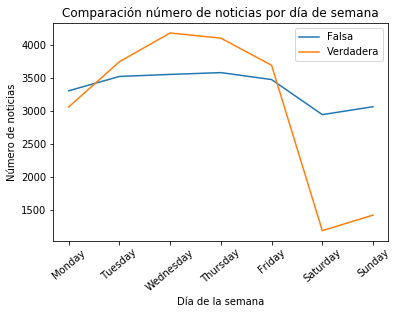

In [31]:
L_dow = ["Monday", "Tuesday", "Wednesday",
         "Thursday", "Friday", "Saturday", "Sunday", ]


def count_dow(ser):
    """Cuenta los días de la semana y los rotúla.
    """
    s = ser.dt.day_name().value_counts()
    s = pd.Series({L_dow[i]: s[L_dow[i]] for i in range(7)})
    return s


ts_t = count_dow(df_true_["date"])
ts_f = count_dow(df_fake_["date"])

my_plot(ts_t, ts_f,
        title="Comparación número de noticias por día de semana",
        xlabel="Día de la semana",
        ylabel="Número de noticias",
        save_name="numero_noticias_dia_semana")

Observamos que las noticias verdaderas sacan noticas de forma constante, mientras que las noticias falsas tiene una baja de más del 50% en los fines de semana.

#### Con respecto a los meses

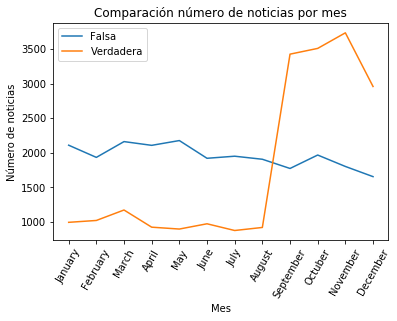

In [32]:
m = {
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "Octuber", 11: "November", 12: "December"
}

def number2month(n):
    """Hace un mapeo del número de un mes, al nombre del mes.
    Retorna None si no se entrega un número entero entre el 1 y el 12.
    """
    return m.get(n, None)

def count_month(ser):
    """Cuenta los meses y los rotúla.
    """
    s = ser.dt.month.map(number2month).value_counts()
    s = pd.Series({m[i]:s[m[i]] for i in range(1, 13)})
    return s

ts_f = count_month(df_fake_["date"])
ts_t = count_month(df_true_["date"])

my_plot(ts_t, ts_f, rotation=60,
        title="Comparación número de noticias por mes",
        xlabel="Mes",
        ylabel="Número de noticias",
        save=True,
        save_name="numero_noticias_mes")

Vemos que las noticias verdaderas se mantienen constantes en los meses, mientras que las noticias falsas se mantienen por debajo de las noticias verdaderas. Sin embargo, esta situación cambia en los últimos meses a partir de agosto. Se puede deber que en esos meses empezaron las presidenciales.

#### Con respecto a lo largo del tiempo

In [68]:
df_fake_["date"].dropna().apply(
    lambda x: pd.Timestamp(x.strftime("%Y-%m"))
).value_counts()

2016-03-01    1088
2016-10-01    1082
2016-01-01    1081
2017-03-01    1066
2017-01-01    1029
2016-02-01    1020
2016-05-01    1012
2016-11-01    1004
2016-04-01     977
2016-09-01     936
2016-12-01     908
2016-08-01     892
2016-07-01     883
2017-02-01     879
2016-06-01     871
2017-05-01     827
2017-06-01     814
2017-04-01     805
2017-08-01     795
2017-07-01     777
2017-09-01     636
2017-10-01     605
2017-11-01     523
2017-12-01     447
2015-05-01     338
2015-04-01     326
2015-12-01     301
2015-07-01     291
2015-10-01     281
2015-11-01     276
2015-06-01     236
2015-08-01     220
2015-09-01     202
2018-02-01      35
2015-03-01       8
Name: date, dtype: int64

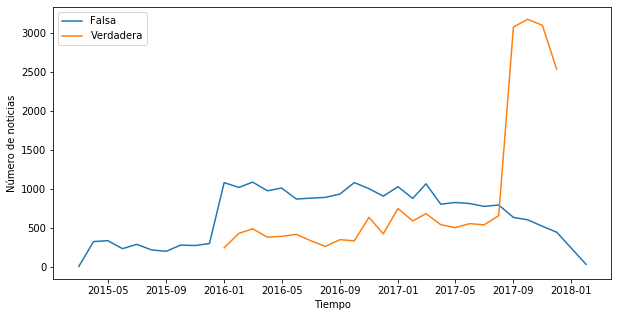

In [73]:
ts_f = df_fake_["date"].dropna().apply(
    lambda x: pd.Timestamp(x.strftime("%Y-%m"))
).value_counts().reset_index().sort_values(by=['index'])

ts_t = df_true_["date"].dropna().apply(
    lambda x: pd.Timestamp(x.strftime("%Y-%m"))
).value_counts().reset_index().sort_values(by=['index'])

# Create a figure containing a single axes.
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ts_f['index'], ts_f['date'], label= 'Falsa')  # Plot some data on the axes.
ax.plot(ts_t['index'], ts_t['date'], label= 'Verdadera')
ax.legend()

rotular(ax,
        title="",
        xlabel="Tiempo",
        ylabel="Número de noticias")

plt.show()

## Nubes de palabras

Se procederá a elaborar las nubes de palabras a partir del cuerpo y el título de las noticias. 

### Preliminares

In [34]:
tokenizer = RegexpTokenizer(r"\w+")
lem = WordNetLemmatizer()
stem = PorterStemmer()
stop_words.add('thi')

In [35]:
def show_wordcloud(data, title=None,
                   save=SAVE_FIG, save_name=None,):
    """
    Retorna la visualización de una nube de palabras.

    :Param data: str, string del texto que se busca visualizar. 
    :Param title: str, título de la figura generada.
    """

    wordcloud = WordCloud(
        background_color='white',
        stopwords=stop_words,
        max_words=200,
        max_font_size=40,
        scale=3,
        random_state=1  # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)

    if save and save_name:
        save_name = f"{save_name}.pdf"
        save_path = path.join(PATH_IMG, save_name)
        plt.savefig(save_path, bbox_inches="tight")

    plt.show()

### Titulares

In [36]:
# Ahora para que el formato de entrada a la función que 
# genera las nubes de palabras sea el correcto, debemos unir la lista 
# en un solo string. 

FAKE_TITLE= " ".join(list(df_fake_proc.title))
TRUE_TITLE= " ".join(list(df_true_proc.title))

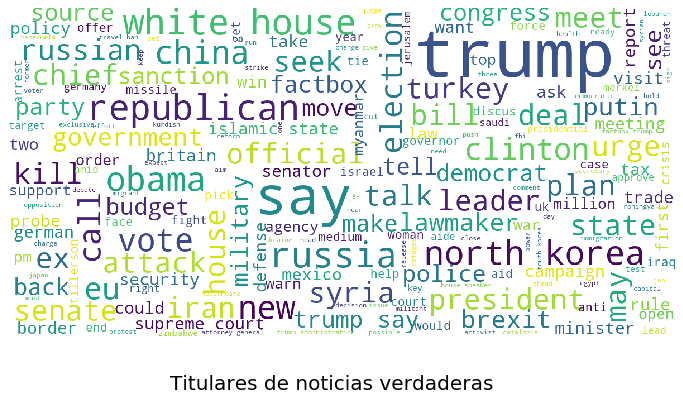

In [37]:
show_wordcloud(TRUE_TITLE, 
               title= 'Titulares de noticias verdaderas',
               save_name="wordcloud_titulares_verdaderas")

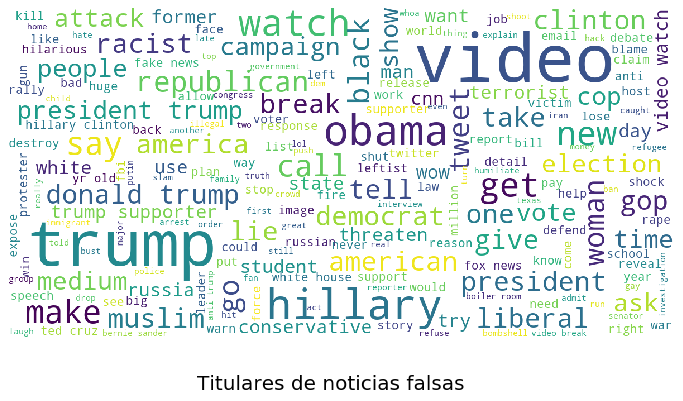

In [38]:
show_wordcloud(FAKE_TITLE, 
               title= 'Titulares de noticias falsas',
               save_name="wordcloud_titulares_falsas")

### Cuerpo de la noticia

In [39]:
# Ahora para que el formato de entrada a la función que genera las nubes de 
# palabras sea el correcto, debemos unir la lista
# en un solo string.

FAKE_TEXT = " ".join(list(df_fake_proc.text))
TRUE_TEXT = " ".join(list(df_true_proc.text))

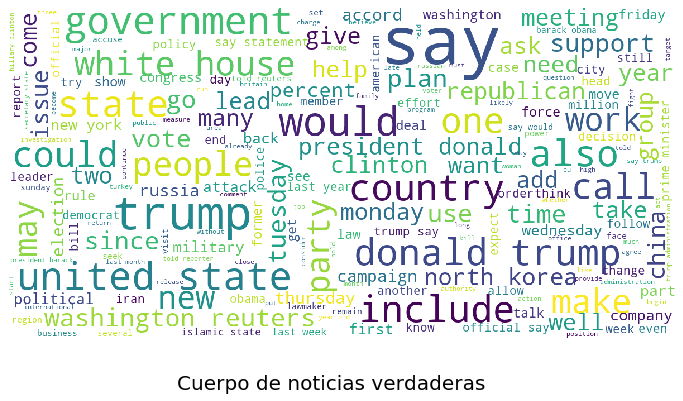

In [40]:
show_wordcloud(TRUE_TEXT,
               title='Cuerpo de noticias verdaderas',
               save_name="wordclouds_cuerpo_verdaderas"
               )

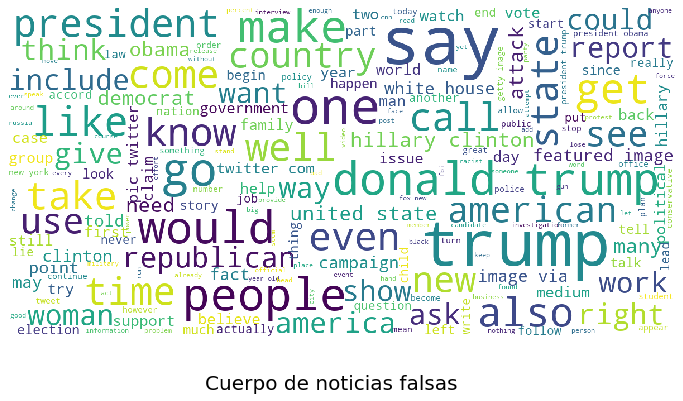

In [41]:
show_wordcloud(FAKE_TEXT,
               title= 'Cuerpo de noticias falsas',
               save_name="wordclouds_cuerpo_falsas"
              )

## Graficos de distribución de frecuencias

In [42]:
def word_frequency(data, n, col,
                   save=SAVE_FIG, save_name=None,):
    word_array = []
    for row in data[col]:
        for word in row.split(' '):
            word_array.append(word)
    print(f'- Frecuencia por {col}:')
    FreqDist(word_array).plot(n)
    
    if save and save_name:
        save_name = f"{save_name}.pdf"
        save_path = path.join(PATH_IMG, save_name)
        plt.savefig(save_path, bbox_inches="tight")

NOTICIAS VERDADERAS
- Frecuencia por title:


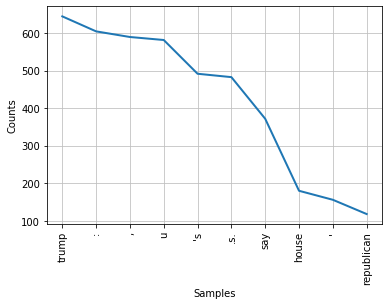

- Frecuencia por text:


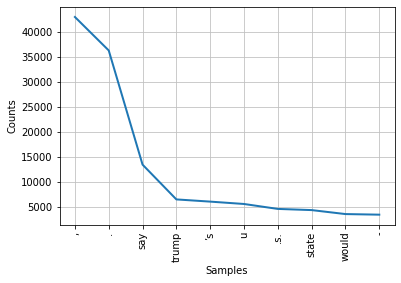

<Figure size 432x288 with 0 Axes>

In [43]:
print('NOTICIAS VERDADERAS')
word_frequency(df_true_proc, 10, "title",
               save_name="freq_title_true")

word_frequency(df_true_proc, 10, "text",
               save_name="freq_text_true")

NOTICIAS FALSAS
- Frecuencia por title:


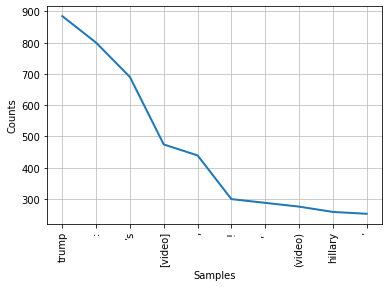

- Frecuencia por text:


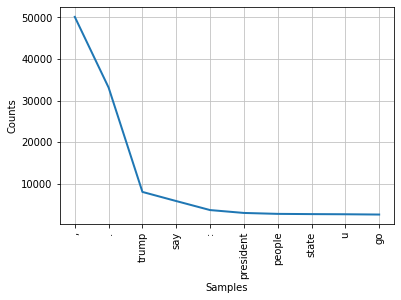

<Figure size 432x288 with 0 Axes>

In [44]:
print('NOTICIAS FALSAS')
word_frequency(df_fake_proc, 10, "title",
               save_name="freq_title_fake")

word_frequency(df_fake_proc, 10, "text",
               save_name="freq_text_fake")

TODAS LAS NOTICIAS
- Frecuencia por title:


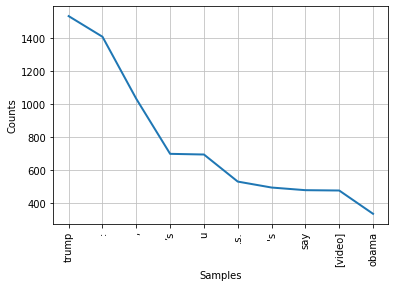

- Frecuencia por text:


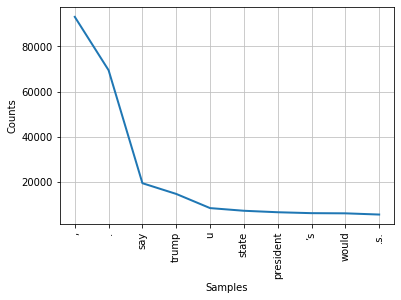

<Figure size 432x288 with 0 Axes>

In [45]:
print('TODAS LAS NOTICIAS')
word_frequency(df_proc, 10, "title",
               save_name="freq_title_all")

word_frequency(df_proc, 10, "text",
               save_name="freq_text_all")

## Clasificación

### Selección de Características

Con el texto tokenizado, se formará un conjunto de $k$ variables que representará a cada una de las palabras (distintas) presentes en el conjunto de noticias (cada palabra será una característica). Dicha asociación palabra-variable puede encontrarse en **vectorizer.get_feature_names()** donde el orden de las palabras corresponde a su variable asociada.

Luego, se transformará cada noticia en un vector de $\mathbb{N_0}^k$ donde la $i$-ésima entrada corresponderá a la cantidad de apariciones de la $i$-ésima en la noticia. De este modo, se tiene una única matriz (**encoded_data**) que almacenará cada una de las noticias, lo cual permitirá realizar regresión logística para obtener el clasificador buscado.

Lo único que falta definir es de qué modo se van a entregar los elementos de cada noticia (título y cuerpo). Se proponen las siguientes opciones:

1. Entregar solo los títulos.
2. Entregar solo los cuerpos (contenido).
3. Entregar título y cuerpo como una única cadena (concatenada).

In [46]:
def data_encoding(data):
    vectorizer = CountVectorizer()
    # matriz de características.
    encoded_data = vectorizer.fit_transform(data).toarray()
    print('Características totales:', len(vectorizer.get_feature_names()))

    print('Características promedio por noticia:')
    print('- Ponderado:',
          np.round(
              np.mean([sum(news_item) for news_item in encoded_data]), 2
          ))
    print('- Simple:',
          np.round(
              np.mean([np.count_nonzero(news_item) for news_item in encoded_data]), 2
          ))
    return encoded_data

In [47]:
X = dict()

print('\nSOLO TÍTULOS')
X['title'] = data_encoding(df_proc_['title'])


SOLO TÍTULOS
Características totales: 7384
Características promedio por noticia:
- Ponderado: 9.39
- Simple: 9.29


In [48]:
print('\nSOLO CUERPO')
X['text'] = data_encoding(df_proc_['text'])


SOLO CUERPO
Características totales: 38709
Características promedio por noticia:
- Ponderado: 241.04
- Simple: 160.31


In [49]:
print('\nTITULOS Y CUERPO')
X['title_text'] = data_encoding(
    [news_item for news_item in df_proc_['title'] + ' ' + df_proc_['text']])


TITULOS Y CUERPO
Características totales: 39048
Características promedio por noticia:
- Ponderado: 250.43
- Simple: 162.86


### Regresión logística 

In [50]:
# clasificación real:
y = list(df_proc_['true'])

In [51]:
def classification(x):

    # partición del conjunto:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

    print('\nTotal de datos:', len(y))
    print('- Datos de entrenamiento:', len(y_train))
    print('- Datos de validación:', len(y_test))

    # clasificación:
    classifier = LogisticRegression()
    classifier.fit(x_train, y_train)

    def classifier_evaluation(x_eval, y_eval):

        # predicciones y probabilidades de acierto para x_eval:
        y_pred = classifier.predict(x_eval)
        y_prob = classifier.predict_proba(x_eval)*100
        
        precision = np.round(accuracy_score(y_eval, y_pred)*100,2)
        print(f'- Precisión (fracción): {precision}%')
        
        prob_acierto = np.round(np.mean([max(prob) for prob in y_prob]),2)
        print(f'- Probabilidad de acierto media: {prob_acierto}%')
        
        conf_matriz = classification_report(y_eval, y_pred)
        print(f'- Matriz de confusion: \n{conf_matriz}') 

    print('\nEvaluación dentro de muestra:')
    classifier_evaluation(x_train, y_train)

    print('\nEvaluación fuera de muestra:')
    classifier_evaluation(x_test, y_test)

In [52]:
print('\nSOLO TÍTULOS')
classification(X['title'])


SOLO TÍTULOS

Total de datos: 4934
- Datos de entrenamiento: 3453
- Datos de validación: 1481

Evaluación dentro de muestra:
- Precisión (fracción): 99.54%
- Probabilidad de acierto media: 90.76%
- Matriz de confusion: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1702
           1       0.99      1.00      1.00      1751

    accuracy                           1.00      3453
   macro avg       1.00      1.00      1.00      3453
weighted avg       1.00      1.00      1.00      3453


Evaluación fuera de muestra:
- Precisión (fracción): 91.15%
- Probabilidad de acierto media: 87.6%
- Matriz de confusion: 
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       732
           1       0.88      0.95      0.92       749

    accuracy                           0.91      1481
   macro avg       0.91      0.91      0.91      1481
weighted avg       0.91      0.91      0.91      1481



In [53]:
print('\nSOLO CUERPO')
classification(X['text'])


SOLO CUERPO

Total de datos: 4934
- Datos de entrenamiento: 3453
- Datos de validación: 1481

Evaluación dentro de muestra:
- Precisión (fracción): 100.0%
- Probabilidad de acierto media: 99.69%
- Matriz de confusion: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1714
           1       1.00      1.00      1.00      1739

    accuracy                           1.00      3453
   macro avg       1.00      1.00      1.00      3453
weighted avg       1.00      1.00      1.00      3453


Evaluación fuera de muestra:
- Precisión (fracción): 98.92%
- Probabilidad de acierto media: 98.77%
- Matriz de confusion: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       720
           1       0.99      0.99      0.99       761

    accuracy                           0.99      1481
   macro avg       0.99      0.99      0.99      1481
weighted avg       0.99      0.99      0.99      1481



In [54]:
print('\nTITULOS Y CUERPO')
classification(X['title_text'])


TITULOS Y CUERPO

Total de datos: 4934
- Datos de entrenamiento: 3453
- Datos de validación: 1481

Evaluación dentro de muestra:
- Precisión (fracción): 100.0%
- Probabilidad de acierto media: 99.76%
- Matriz de confusion: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1739
           1       1.00      1.00      1.00      1714

    accuracy                           1.00      3453
   macro avg       1.00      1.00      1.00      3453
weighted avg       1.00      1.00      1.00      3453


Evaluación fuera de muestra:
- Precisión (fracción): 98.18%
- Probabilidad de acierto media: 98.75%
- Matriz de confusion: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       695
           1       0.98      0.99      0.98       786

    accuracy                           0.98      1481
   macro avg       0.98      0.98      0.98      1481
weighted avg       0.98      0.98      0.98      14

### Naive bayes

In [55]:
def classification(x):

    # partición del conjunto:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

    print('\nTotal de datos:', len(y))
    print('- Datos de entrenamiento:', len(y_train))
    print('- Datos de validación:', len(y_test))

    # clasificación:
    classifier = GaussianNB()
    classifier.fit(x_train, y_train)

    def classifier_evaluation(x_eval, y_eval):

        # predicciones y probabilidades de acierto para x_eval:
        y_pred = classifier.predict(x_eval)
        y_prob = classifier.predict_proba(x_eval)*100
        
        precision = np.round(accuracy_score(y_eval, y_pred)*100,2)
        print(f'- Precisión (fracción): {precision}%')
        
        prob_acierto = np.round(np.mean([max(prob) for prob in y_prob]),2)
        print(f'- Probabilidad de acierto media: {prob_acierto}%')
        
        conf_matriz = classification_report(y_eval, y_pred)
        print(f'- Matriz de confusion: \n{conf_matriz}') 

    print('\nEvaluación dentro de muestra:')
    classifier_evaluation(x_train, y_train)

    print('\nEvaluación fuera de muestra:')
    classifier_evaluation(x_test, y_test)

In [56]:
print('\nSOLO TÍTULOS')
classification(X['title'])


SOLO TÍTULOS

Total de datos: 4934
- Datos de entrenamiento: 3453
- Datos de validación: 1481

Evaluación dentro de muestra:
- Precisión (fracción): 98.7%
- Probabilidad de acierto media: 100.0%
- Matriz de confusion: 
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1695
           1       0.98      1.00      0.99      1758

    accuracy                           0.99      3453
   macro avg       0.99      0.99      0.99      3453
weighted avg       0.99      0.99      0.99      3453


Evaluación fuera de muestra:
- Precisión (fracción): 86.09%
- Probabilidad de acierto media: 100.0%
- Matriz de confusion: 
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       739
           1       0.85      0.87      0.86       742

    accuracy                           0.86      1481
   macro avg       0.86      0.86      0.86      1481
weighted avg       0.86      0.86      0.86      1481



In [57]:
print('\nSOLO CUERPO')
classification(X['text'])


SOLO CUERPO

Total de datos: 4934
- Datos de entrenamiento: 3453
- Datos de validación: 1481

Evaluación dentro de muestra:
- Precisión (fracción): 98.52%
- Probabilidad de acierto media: 100.0%
- Matriz de confusion: 
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1676
           1       0.97      1.00      0.99      1777

    accuracy                           0.99      3453
   macro avg       0.99      0.98      0.99      3453
weighted avg       0.99      0.99      0.99      3453


Evaluación fuera de muestra:
- Precisión (fracción): 84.47%
- Probabilidad de acierto media: 100.0%
- Matriz de confusion: 
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       758
           1       0.86      0.81      0.84       723

    accuracy                           0.84      1481
   macro avg       0.85      0.84      0.84      1481
weighted avg       0.85      0.84      0.84      1481



In [58]:
print('\nTITULOS Y CUERPO')
classification(X['title_text'])


TITULOS Y CUERPO

Total de datos: 4934
- Datos de entrenamiento: 3453
- Datos de validación: 1481

Evaluación dentro de muestra:
- Precisión (fracción): 99.36%
- Probabilidad de acierto media: 100.0%
- Matriz de confusion: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1656
           1       0.99      1.00      0.99      1797

    accuracy                           0.99      3453
   macro avg       0.99      0.99      0.99      3453
weighted avg       0.99      0.99      0.99      3453


Evaluación fuera de muestra:
- Precisión (fracción): 82.71%
- Probabilidad de acierto media: 100.0%
- Matriz de confusion: 
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       778
           1       0.82      0.81      0.82       703

    accuracy                           0.83      1481
   macro avg       0.83      0.83      0.83      1481
weighted avg       0.83      0.83      0.83      14

### Análisis de Discriminante Lineal

In [62]:
def classification(x):

    # partición del conjunto:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

    print('\nTotal de datos:', len(y))
    print('- Datos de entrenamiento:', len(y_train))
    print('- Datos de validación:', len(y_test))

    # clasificación:
    classifier = LinearDiscriminantAnalysis()
    classifier.fit(x_train, y_train)

    def classifier_evaluation(x_eval, y_eval):

        # predicciones y probabilidades de acierto para x_eval:
        y_pred = classifier.predict(x_eval)
        y_prob = classifier.predict_proba(x_eval)*100
        
        precision = np.round(accuracy_score(y_eval, y_pred)*100,2)
        print(f'- Precisión (fracción): {precision}%')
        
        prob_acierto = np.round(np.mean([max(prob) for prob in y_prob]),2)
        print(f'- Probabilidad de acierto media: {prob_acierto}%')
        
        conf_matriz = classification_report(y_eval, y_pred)
        print(f'- Matriz de confusion: \n{conf_matriz}') 

    print('\nEvaluación dentro de muestra:')
    classifier_evaluation(x_train, y_train)

    print('\nEvaluación fuera de muestra:')
    classifier_evaluation(x_test, y_test)

In [59]:
print('\nSOLO TÍTULOS')
classification(X['title'])


SOLO TÍTULOS

Total de datos: 4934
- Datos de entrenamiento: 3453
- Datos de validación: 1481

Evaluación dentro de muestra:
- Precisión (fracción): 98.18%
- Probabilidad de acierto media: 100.0%
- Matriz de confusion: 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1708
           1       0.97      1.00      0.98      1745

    accuracy                           0.98      3453
   macro avg       0.98      0.98      0.98      3453
weighted avg       0.98      0.98      0.98      3453


Evaluación fuera de muestra:
- Precisión (fracción): 84.81%
- Probabilidad de acierto media: 100.0%
- Matriz de confusion: 
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       726
           1       0.84      0.87      0.85       755

    accuracy                           0.85      1481
   macro avg       0.85      0.85      0.85      1481
weighted avg       0.85      0.85      0.85      1481



In [60]:
print('\nSOLO CUERPO')
classification(X['text'])


SOLO CUERPO

Total de datos: 4934
- Datos de entrenamiento: 3453
- Datos de validación: 1481

Evaluación dentro de muestra:
- Precisión (fracción): 98.87%
- Probabilidad de acierto media: 100.0%
- Matriz de confusion: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1707
           1       0.98      1.00      0.99      1746

    accuracy                           0.99      3453
   macro avg       0.99      0.99      0.99      3453
weighted avg       0.99      0.99      0.99      3453


Evaluación fuera de muestra:
- Precisión (fracción): 82.92%
- Probabilidad de acierto media: 100.0%
- Matriz de confusion: 
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       727
           1       0.85      0.81      0.83       754

    accuracy                           0.83      1481
   macro avg       0.83      0.83      0.83      1481
weighted avg       0.83      0.83      0.83      1481



In [61]:
print('\nTITULOS Y CUERPO')
classification(X['title_text'])


TITULOS Y CUERPO

Total de datos: 4934
- Datos de entrenamiento: 3453
- Datos de validación: 1481

Evaluación dentro de muestra:
- Precisión (fracción): 99.3%
- Probabilidad de acierto media: 100.0%
- Matriz de confusion: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1687
           1       0.99      1.00      0.99      1766

    accuracy                           0.99      3453
   macro avg       0.99      0.99      0.99      3453
weighted avg       0.99      0.99      0.99      3453


Evaluación fuera de muestra:
- Precisión (fracción): 84.88%
- Probabilidad de acierto media: 100.0%
- Matriz de confusion: 
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       747
           1       0.85      0.85      0.85       734

    accuracy                           0.85      1481
   macro avg       0.85      0.85      0.85      1481
weighted avg       0.85      0.85      0.85      148

## Tutorial nltk 

Vale: Ya hice algunos imports y le cambié el nombre a algunas funciones que tenían nombre muy largo. Así que ahora lo voy a explicar: 

tokenizer = RegexpTokenizer(r"\w+") 

Lo que hace es separar un string de un párrafo u oración en una lista de strings con las palabras. La diferencia con la función 'word_tokenize', es que RegexpTokenize puede configurarse para aceptar solamente ciertos caracteres. El argumento r"\w+" es para que ignore la puntuación del texto y no la incluya en la lista. Sé que también se puede configurar para ignorar los números, habría que buscar en google el argumento correcto. 

stem = PorterStemmer()

Lo que hace es devolver una palabra o verbo conjugado a su palabra raíz.

lem = WordNetLemmatizer()

Lo que hace es devolver una palabra o verbo conjugado a su palabra raíz. Dependiendo del segundo argumento que reciba (el primer argumento en el texto como string) puede definir las raices como verbos, pronombres, etc. A diferencia de steamming, relaciona las palabras con su significado, no solamente a partir de la gramática. Esta página (https://www.machinelearningplus.com/nlp/lemmatization-examples-python/) explica que para hacerlo bien hay que usar POS tag, que es otra función que detecta si la palabra es adjetivo, adverbio, sustantivo o verbo, y así WordNetLemmatizer() se puede llamar de forma adecuada para cada palabra.

stop_words=set(stopwords.words("english"))

Es un set con los pronombres, preposiciones, y otro tipo de palabras que no aportan valor. Usando add se pueden incluir palabras nuevas. 

A continuación un ejemplo de uso. 

In [63]:
txt= df[TITLE][325]

print ( 'El texto original es: ' + txt + '\n')

token_txt= tokenizer.tokenize(txt)

print('El texto toquenizado es: ' )
print(token_txt)
print('\n')

stop_txt=[]
for i in token_txt: 
    if i not in stop_words:
        stop_txt.append(i)

print('El texto sin stop words es: ' )
print(stop_txt)
print('\n')

stem_txt= []
for i in stop_txt:
    stem_txt.append(stem.stem(i))
    
print('El texto stemizado es: ' )
print(stem_txt)  


El texto original es: Former Trump aide nomination to be Singapore envoy stalled over Russia concerns

El texto toquenizado es: 
['Former', 'Trump', 'aide', 'nomination', 'to', 'be', 'Singapore', 'envoy', 'stalled', 'over', 'Russia', 'concerns']


El texto sin stop words es: 
['Former', 'Trump', 'aide', 'nomination', 'Singapore', 'envoy', 'stalled', 'Russia', 'concerns']


El texto stemizado es: 
['former', 'trump', 'aid', 'nomin', 'singapor', 'envoy', 'stall', 'russia', 'concern']


PD: Cuando estaba programando las nubes de palabras, me di cuenta de que en las noticias falsas, los títulos van siempre con la primera letra de cada palabra en mayúscula (y en las noticias verdaderas no pasa). Podríamos hacer una predicción sin cambiar eso, para ver si considera las mayúsculas como importantes y después otra usando todo en minúscula, porque igual es la media trampa. 